In [3]:
"""Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:

Построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Можете взять открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
данные об уровне счастья в разных странах;
Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix"""

from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_2016 = pd.read_csv('2016.csv')
df_2016.head(100)
# Комментарий: данные по составу за 2015,2016,2017,2018,2019 год одинаковые.
#Можно сделать "формулы" с одним годом, далее просто подставлять данные и других годов и по-новому интерпретировать 

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vietnam,Southeastern Asia,96,5.061,4.991,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180
96,Somaliland Region,Sub-Saharan Africa,97,5.057,4.934,5.180,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479,2.43801
97,Tunisia,Middle East and Northern Africa,98,5.045,4.965,5.125,0.97724,0.43165,0.59577,0.23553,0.08170,0.03936,2.68413
98,Greece,Western Europe,99,5.033,4.935,5.131,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,2.12944


In [4]:
df_2016.info() # смотрим из чего состоит файл с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [5]:
df_2016.columns # смотрим какие столбцы

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [83]:
df_2016= df_2016.rename(columns = {'Economy (GDP per Capita)': 'Economy'}) #переменуем название столбцов на более короткие 
df_2016= df_2016.rename(columns = {'Health (Life Expectancy)': 'Health'})
df_2016= df_2016.rename(columns = {'Trust (Government Corruption)': 'Government'})
df_2016.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Government,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [6]:
countries=list(df_2016['Country'].unique()) # смотрим  сколько уникальных стран в файле с данными
len(countries)

157

In [7]:
df_countries=pd.DataFrame(countries)
df_countries # смотрим какие именно страны присутствуют в файле

,0
0,Denmark
1,Switzerland
2,Iceland
3,Norway
4,Finland
...,...
152,Benin
153,Afghanistan
154,Togo
155,Syria


In [143]:
print('Самые счастливые страны Топ-10 в 2016 году :')
tophappycountry_df_2016=df_2016['Country'].head(10)
tophappycountry_df_2016
""" Пятерка самых счастливых стран - это жители скандинавских стран Европы. 
Там качественое образование, прогрессивная шкала налогообложения, 
общепризнанное соблюдение баланс между работой и личной жизнью, борьба за экологичность жизни(переработка мусора, 
использование, возобновляемых источников энергии) 

Самые счастливые страны Топ-10 в 2016 году :


0        Denmark
1    Switzerland
2        Iceland
3         Norway
4        Finland
5         Canada
6    Netherlands
7    New Zealand
8      Australia
9         Sweden
Name: Country, dtype: object

In [76]:
happiness_part=[]

for i in countries:
    country=df_2016[df_2016['Country']==i]
    part=sum(country['Happiness Score'])/len(countries)
    happiness_part.append(part)

In [150]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [20]:
regions=list(df_2016['Region'].unique())
print(len(regions))

10


In [21]:
df_region=pd.DataFrame(regions)
df_region.head(10)

,0
0,Western Europe
1,North America
2,Australia and New Zealand
3,Middle East and Northern Africa
4,Latin America and Caribbean
5,Southeastern Asia
6,Central and Eastern Europe
7,Eastern Asia
8,Sub-Saharan Africa
9,Southern Asia


In [22]:
happiness_regions=[]

for re in regions:
    region=df_2016[df_2016['Region']==re]
    range_=sum(region['Happiness Score'])/len(region)
    happiness_regions.append(range_)
df_region['Happiness Score']=happiness_regions

In [12]:
df_region

,0
0,Western Europe
1,North America
2,Australia and New Zealand
3,Middle East and Northern Africa
4,Latin America and Caribbean
5,Southeastern Asia
6,Central and Eastern Europe
7,Eastern Asia
8,Sub-Saharan Africa
9,Southern Asia


In [136]:
df_bar=df_region.sort_values('Happiness Score',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

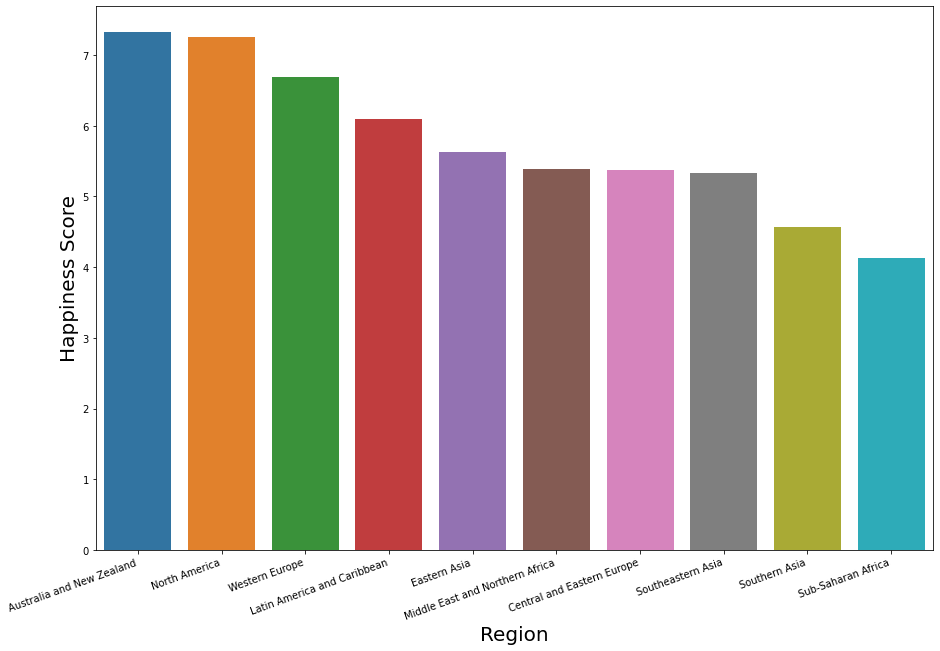

In [30]:
# строим столбчатую диаграмму зависимость "Ощущения счастья" от "региона проживания"
plt.figure(figsize=(15,10))
sns.barplot(x=df_bar[0],y=df_bar['Happiness Score'])
plt.xlabel('Region',fontsize=20)
plt.ylabel('Happiness Score',fontsize=20)
plt.xticks(rotation=10,ha='right')
"""Комментарий: на первом месте ожидаемо оказался теплый регион Австралия и наиболее живописный Новая Зеландия. 
Также эти регионы достаточно обособлены от других регионов, можно предположить что жители этих мест субъективно воспринимают 
действительность и просто не знают как обстоят дела по исследуемым параметрам жизни в других странах. 
В числе лидеров также страны Европы. В аутсайдерах жители Африки и Азии, что логично связано с  низким уровнем медицины, 
высокой младенческой смертностью, режимом антисанитари городов из-за перенаселения или отсутствия воды.


In [30]:
#DataFrame описание минимальное, максимальное значение
display(df_2016.describe())

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


Text(0.5, 1.0, 'Распределение параметров')

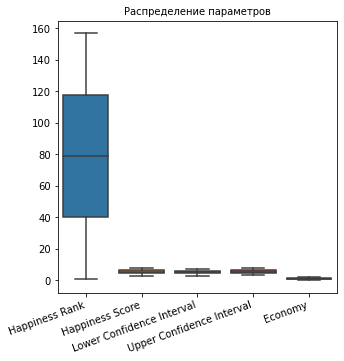

In [146]:
#Boxplot -ящик с усами
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=df_2016.iloc[:,0:7])
plt.xticks(rotation=20,ha='right');
ax.set_title("Распределение параметров",fontsize=10)

In [95]:
Economy=[]
Family=[]
Health=[]
for i in regions:
    region=df_2016[df_2016['Region']==i]
    Economy.append(sum(region.Economy)/len(region))
    Family.append(sum(region.Family)/len(region))
    Health.append(sum(region.Health)/len(region))

Text(0, 0.5, 'Regions')

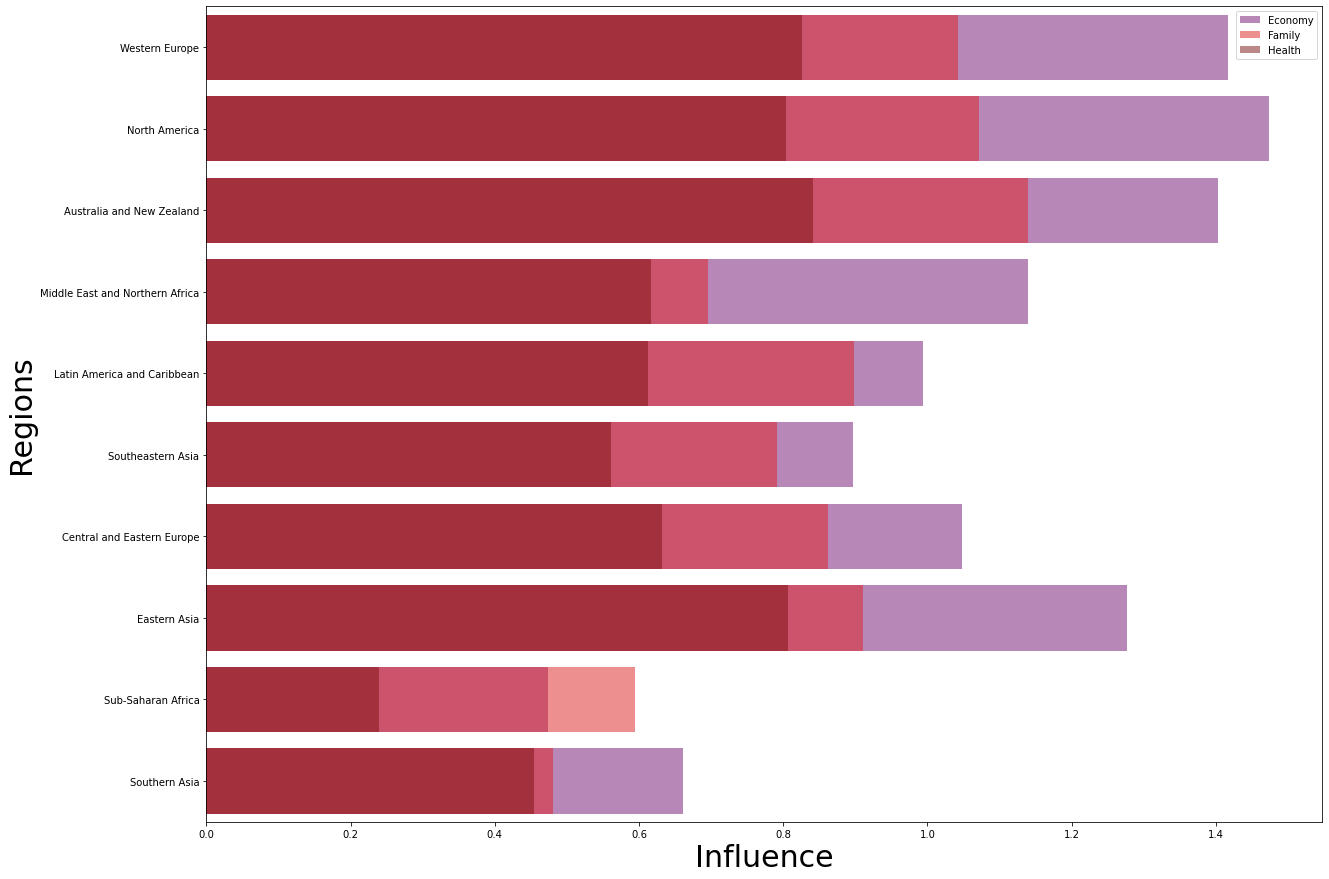

In [104]:
plt.figure(figsize=(20,15))
sns.barplot(x=Economy, y=regions, color='purple', alpha=0.5,label='Economy')
sns.barplot(x=Family, y=regions, color='red', alpha=0.5,label='Family')
sns.barplot(x=Health, y=regions, color='darkred', alpha=0.5,label='Health')

plt.legend(loc='best')

plt.xlabel('Influence',fontsize=30)
plt.ylabel('Regions',fontsize=30)
# Оцениваем влияние факторов Economy, Family, Health по регионам
#хорошо видна тендеция, что здоровье весомее других факторов
""""Факторы счастья – как средства, так и условия – делятся на группы в зависимости от происхождения:
    счастливый либо приобрел их сам, либо получил в дар от судьбы. Одни и те же средства и условия счастья
    достаются людям по-разному: не только благосостояние одни получают по наследству, а другие приобретают сами, 
    но и здоровье один имеет от рождения, а другой приобретает только благодаря суровому режиму,
    один имеет врожденнный оптимизм, другой должен долго работать над собой, чтобы выработать его. 
    Поэтому можно сделать бывод, что множественные аспекты жизни в благополучных странах отлично влияют на потомство,
    на наследственность, это и экология, и экономическая составляющая "дать путевку в жизнь" 
    = возможность обеспечения образованием, работой, стабильной зарплатой, стабильно высоким уровнем жизни"

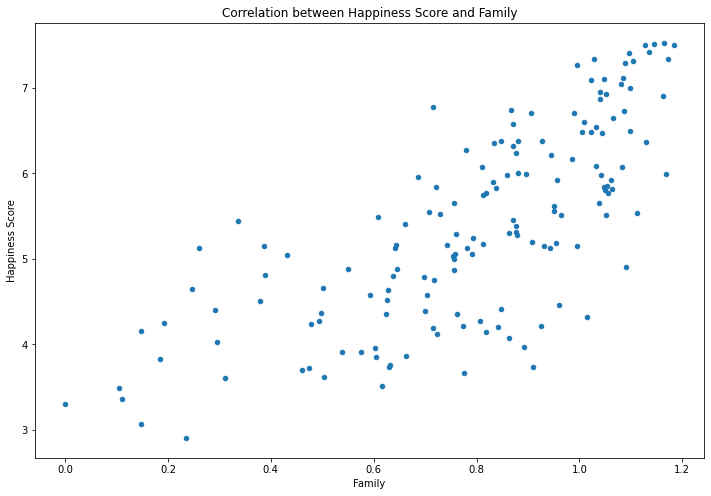

In [155]:
df_2016.plot(kind='scatter', 
        x='Family', 
        y='Happiness Score', 
        title='Correlation between Happiness Score and Family')
plt.show()
"""Даже не смотря на то, что не озвучено, что именно включает в себя показатель "Семья"
1) наличие брака/замужества у человека в стране
2) наличие ребенка, состав семьи-чем больше, тем лучше
3) переемственность поколений ( поддерживание связи со старшим поколением, проживание с ними вместе)
видна прямая зависимость от осознания человека счастливым будучи в определенной степени семейным. Проведя условную медиану, 
по 0,6*Family, справа от нее -отчетлив прослеживается скопление более счастливых"""

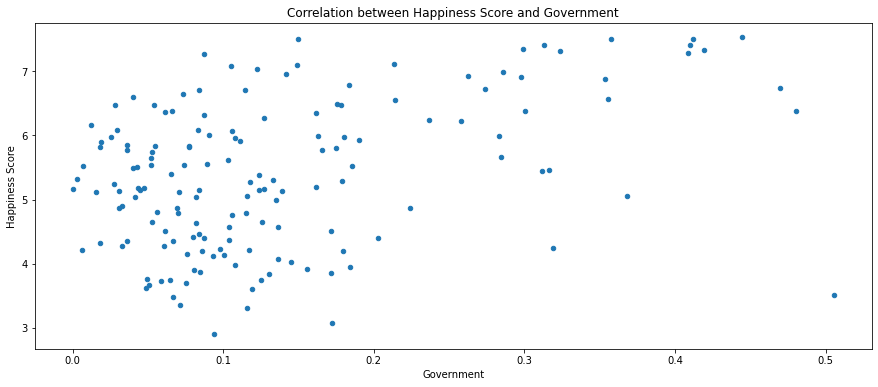

In [132]:
df_2016.plot(kind='scatter', 
        x='Government', 
        y='Happiness Score', 
        title='Correlation between Happiness Score and Government')
"""Отмечается наличие некоторых выбросов, главным образом в категориях доверия правительству
Чем болmit доверия власти, тем более спокоен и счастлив человек"""

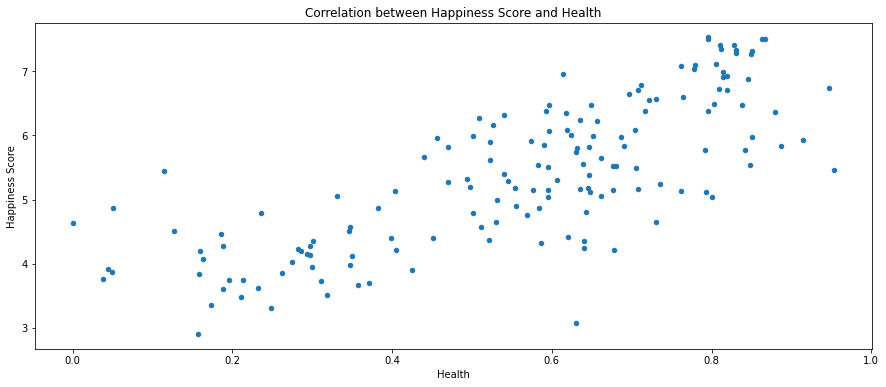

In [133]:
df_2016.plot(kind='scatter', 
        x='Health', 
        y='Happiness Score', 
        title='Correlation between Happiness Score and Health')
"""прямая зависимость между здоровьем(ощущением себя здоровым) и ощущением счастья, 
чем больше ты здоров или доступна медицинская помощь, тем твое самочувствие лучше и следовательно тем более человек счастлив.
И аксиома по интерпретации выбросов на этой визуализации = если ты не здоров, ты точно не счастлив.

In [90]:
#Стилизация таблиц
rating_df = df_2016.groupby('Happiness Score')[['Health']].sum()\
    .sort_values('Health', ascending=False).head(10)
    
rating_df

,Health
Happiness Score,
5.835,1.57703
6.379,1.38832
5.458,0.95277
6.739,0.94719
5.921,0.91491
6.361,0.87896
7.501,0.86733
7.509,0.86303
7.313,0.85120


In [91]:
rating_df.style.bar(align='mid')

,Health
Happiness Score,
5.835,1.577030
6.379,1.388320
5.457999999999999,0.952770
6.739,0.947190
5.921,0.914910
6.361000000000001,0.878960
7.501,0.867330
7.5089999999999995,0.863030
7.313,0.851200


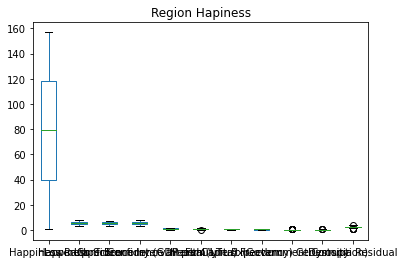

In [72]:
# хорошо подходит для поиска выбросов! 
#не понимаю, почему они такие приплющенные и как сделать, чтобы названия по х не накладывались друг на друга, 
# может надо сделать другую шкалу
df_2016.plot(kind='box',
                   title='Region Hapiness')

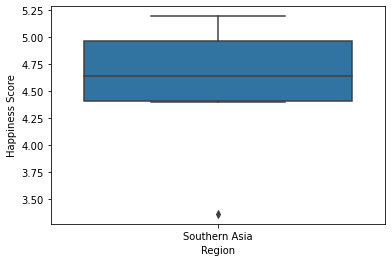

In [74]:
sns.boxplot(x="Region", y="Happiness Score", 
            data=df_2016[df_2016.isin(region)])

Text(0.5, 1.0, 'Correlation between Health and Happiness Score')

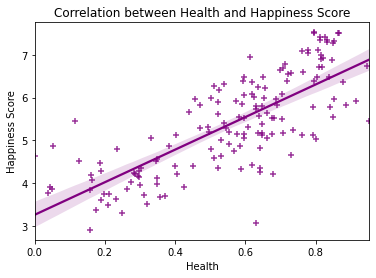

In [92]:
# посмотрим зависимость ощущения счатья от здоровья
ax = sns.regplot(data=df_2016, x='Health', y='Happiness Score', color='purple', marker='+')
ax.set_title('Correlation between Health and Happiness Score')
# видим скользящую уровня счастья

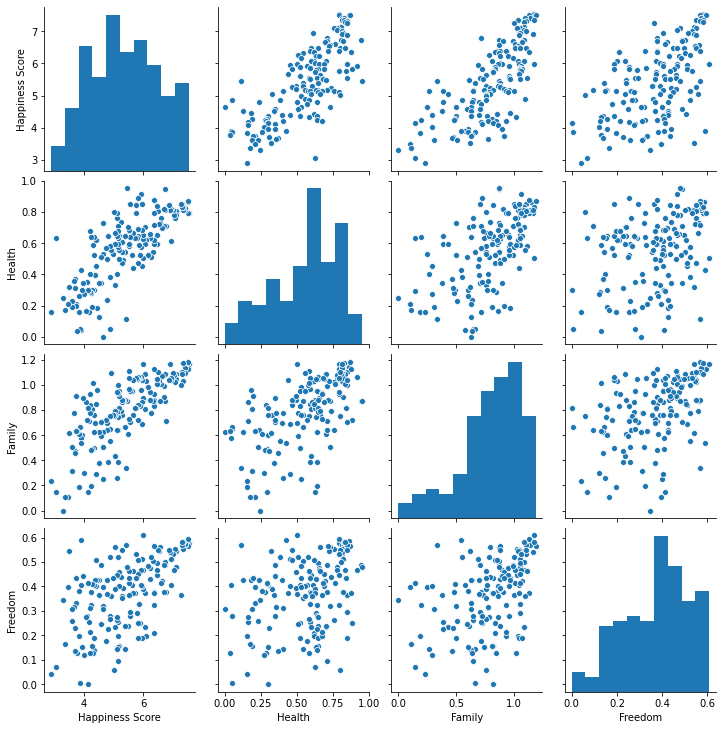

In [149]:
# plot (scatter plot matrix) поможет нам посмотреть на одной картинке, 
# как связаны между собой различные признаки Happiness Score, Health , Family в наборе данных
sns.pairplot(df_2016[['Happiness Score','Health', 'Family', 'Freedom']])

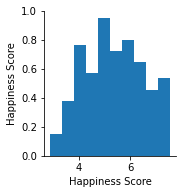

In [53]:
sns.pairplot(df_2016[['Happiness Score','Region']])

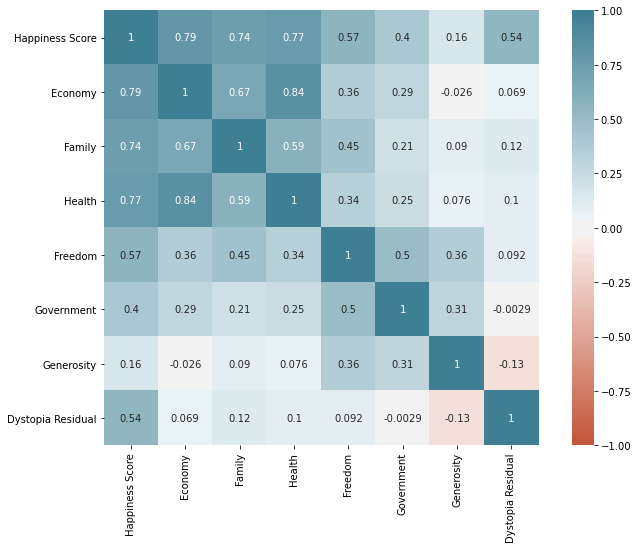

In [152]:
#Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_2016[['Happiness Score', 'Economy', 'Family', 'Health','Freedom', 'Government', 'Generosity',
       'Dystopia Residual']].corr(),vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True)

In [156]:
# На мой взгляд ощущение счастье может быть только в стране со стабильной экномической, социальной и политической атмосферой. 
# Где человек может планировать свое будущеее и быть уверенным в позитивном будущем своих детей, 
#поэтому буквально глянув на первую пятерку стран в 2015году и в 2017 году (год до и после исследуемого)
# ПОНИМАЕШЬ СТАБИЛЬНОСТЬ - ПРИЗНАК МАСТЕРСТВА), в лидерах опять страны из Скандинавской Европы
df_2015 = pd.read_csv('2015.csv')
df_2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [157]:
df_2017 = pd.read_csv('2017.csv')
df_2017.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
